In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

There are 9 cells in this image


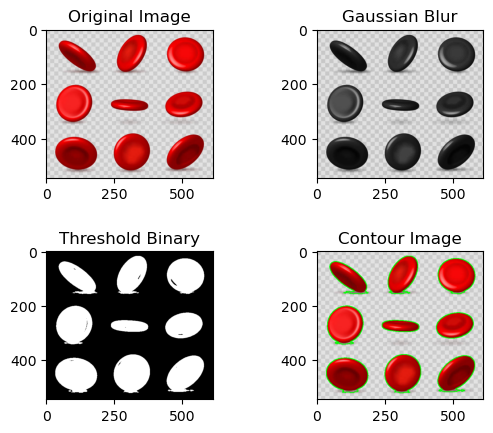

In [5]:
# Update the image path
image = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week3\Figures\RedBloodCells.jpg')

plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")

# convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(222), plt.imshow(gray_image, 'gray'), plt.title("Gaussian Blur")

# convert the grayscale image to binary image
ret, thresh = cv2.threshold(gray_image, 165, 255, cv2.THRESH_BINARY_INV)
plt.subplot(223), plt.imshow(thresh, 'gray'), plt.title("Threshold Binary")

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out smaller contours based on area threshold
min_contour_area = 500  #set the threshold area
# Select only contours whose area > min_contour_area
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

RedBlood = cv2.drawContours(image.copy(), filtered_contours, -1, (0, 255, 0), 2)
print("There are %d cells in this original image" % (len(filtered_contours)))

# display output image
plt.subplot(224), plt.imshow(cv2.cvtColor(RedBlood, cv2.COLOR_BGR2RGB)), plt.title("Contour Image")

# Add gap between upper and lower images
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

# Prepare for image with centroids
image_with_centroids = image.copy()

for c in filtered_contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    
    # Calculate centroid position 
    Xbar = int(M["m10"] / M["m00"])  # centroid along x-axis
    Ybar = int(M["m01"] / M["m00"])  # centroid along y-axis

    # Draw a circle at the centroid position
    cv2.circle(image_with_centroids, (Xbar, Ybar), 5, (255, 255, 255), -1)

    # Insert text "centroid" at position (Xbar-25, Ybar-25)
    cv2.putText(image_with_centroids, "centroid", (Xbar - 25, Ybar - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Display the image with centroids
cv2.imshow("Red-Blood Cell Image with Centroids", image_with_centroids)
cv2.waitKey(0)
cv2.destroyAllWindows()

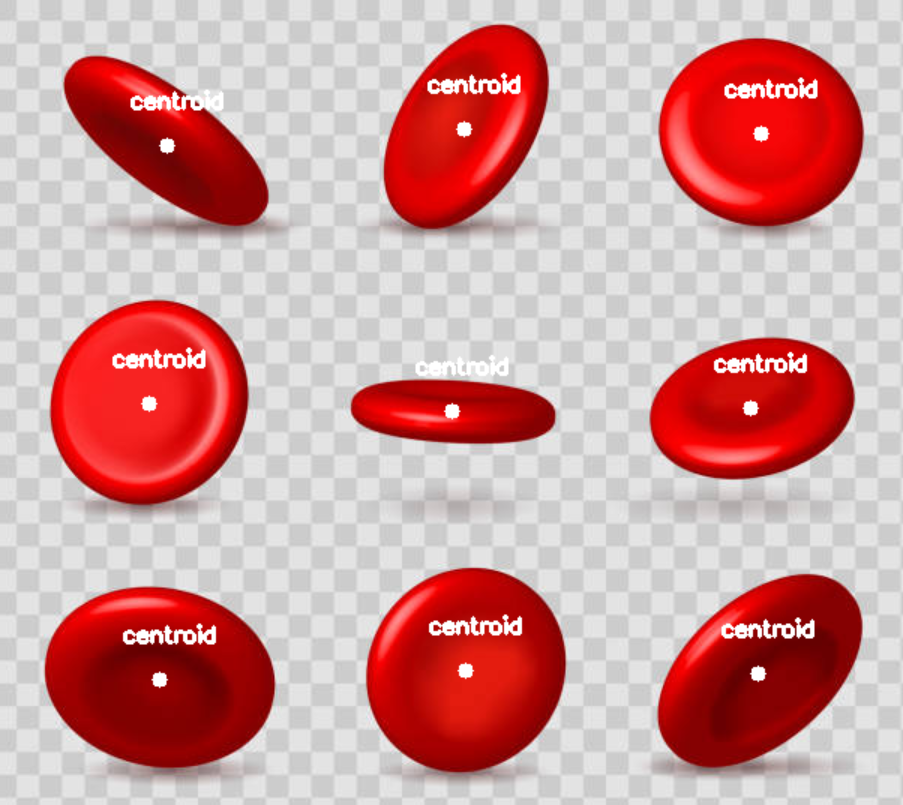